# PUC-Rio 
## Departamento de Engenharia El√©trica
## Trabalho 3 - Mapas de Kohonen

Estudante: Paloma Sette

In [1]:
!git clone https://github.com/mdrs-thiago/minisom
import os 
os.chdir('minisom')

fatal: destination path 'minisom' already exists and is not an empty directory.


In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import minmax_scale, MinMaxScaler, StandardScaler, Normalizer, RobustScaler, LabelEncoder


from minisom import MiniSom

In [7]:
dataset = pd.read_csv(
    'https://raw.githubusercontent.com/mdrs-thiago/PUC_Redes_Neurais/main/datasets/c_breast_cancer.csv')

In [8]:
values = dataset.values[:,:-1]

## Parte 1 - Testando configura√ß√µes

Nesta primeira etapa, iremos investigar como a configura√ß√£o do mapa pode mudar de acordo com a escolha de par√¢metros. 

##### 1. Escolha os par√¢metros para o primeiro teste usando SOM. Para cada par√¢metro, justifique sua escolha. Avalie o resultado.

**Par√¢metros escolhidos**:

- **Tamanho do mapa (`m = 10, n = 10`)**  
  Escolhemos uma grade 10x10 para permitir que os grupos se distribuam com espa√ßo suficiente, evitando sobreposi√ß√£o. √â um tamanho intermedi√°rio, bom para come√ßar a visualiza√ß√£o sem granularidade excessiva.

- **Taxa de aprendizado na ordena√ß√£o (`lr_ordering = 0.001`)**  
  Um valor pequeno, mas ainda eficaz para a fase inicial de ajuste dos pesos. Evita oscila√ß√µes bruscas e permite que o SOM forme regi√µes est√°veis.

- **Taxa no ajuste fino (`lr_finetuning = 0.0001`)**  
  Muito menor que a anterior, usada para pequenas corre√ß√µes nos pesos ap√≥s a estrutura geral estar formada.

- **Fun√ß√£o de decaimento (`decay_fcn`)**  
  Escolhemos um decaimento suave baseado em:
  $$new_{lr} = \frac{lr} {1 + 2 * \frac{t } {max_t}}$$
  Isso reduz gradualmente a influ√™ncia das atualiza√ß√µes ao longo do tempo.

- **Topologia `"hexagonal"`**  
  A topologia hexagonal permite uma vizinhan√ßa mais fluida entre os neur√¥nios, com mais conectividade do que a grade retangular.

- **Dataset**: `breast_cancer`  
  A base escolhida apresenta dados cl√≠nicos com atributos cont√≠nuos, ideal para observar agrupamentos naturais em dados de sa√∫de.

**Avalia√ß√£o dos resultados**:

O gr√°fico gerado das curvas de erro mostra:

- **Erro de quantiza√ß√£o** (`quantization_error`):  
  Mede o qu√£o distante, em m√©dia, cada vetor de entrada est√° do seu neur√¥nio vencedor. Uma queda nessa curva indica que os neur√¥nios est√£o se especializando bem.

- **Erro topogr√°fico** (`topographic_error`):  
  Mede se os dois neur√¥nios mais pr√≥ximos do dado tamb√©m s√£o vizinhos no mapa. Quanto menor, melhor preserva√ß√£o topol√≥gica.

Durante a ordena√ß√£o, os erros caem rapidamente, mostrando que o SOM est√° aprendendo.  
Durante o finetuning, os erros estabilizam em valores baixos, indicando que os ajustes finos foram bem-sucedidos.


In [ ]:
#decay function 

def decay_fcn(lr,actual_t,max_t):
    '''
    Fun√ß√£o para decaimento da taxa de aprendizado. 
    
    ## INPUTS:
    lr - Taxa de aprendizado inicial
    actual_t - Tempo atual da itera√ß√£o
    max_t - Tempo m√°ximo da itera√ß√£o

    ## OUTPUT:
    - taxa de aprendizado atualizada.
    '''

    new_lr = lr/(1 + 2*actual_t/max_t)

    return new_lr


m = 10 #Dimens√£o X do mapa de Kohonen
n = 10 #Dimens√£o Y do mapa de Kohonen
lr_ordering = 0.001 #Taxa de aprendizado - Ordering phase
lr_finetuning = 0.0001 #Taxa de aprendizado - Finetuning phase

topology = "hexagonal"

ordering_time = 1000 
finetuning_time = 10000 
decay_fun =  decay_fcn 

#Dimens√£o do vetor de entrada
input_len = values.shape[1]

X = minmax_scale(values)

In [13]:
som = MiniSom(m,n,input_len,learning_rate=lr_ordering,topology=topology,decay_function=decay_fcn)
som.pca_weights_init(X)

som.train_random(X, ordering_time, verbose=True)


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.9978060414354106


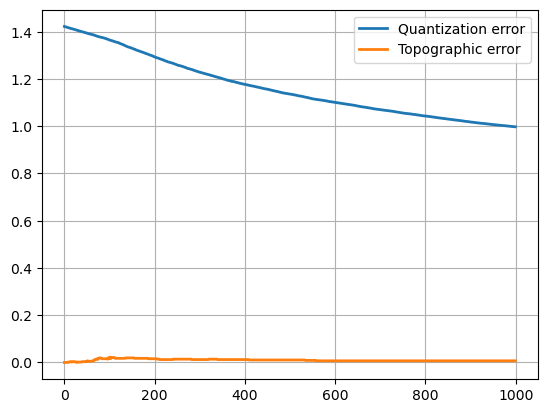

In [14]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

O gr√°fico mostra duas m√©tricas fundamentais durante o treinamento da SOM:

- **Erro de quantiza√ß√£o (linha azul):**  
  Houve uma queda progressiva ao longo das itera√ß√µes, indicando que os neur√¥nios est√£o se tornando mais pr√≥ximos dos dados de entrada, ou seja, o mapa est√° se ajustando bem √† distribui√ß√£o dos dados.

- **Erro topogr√°fico (linha laranja):**  
  Se manteve muito pr√≥ximo de zero, o que √© um excelente indicativo. Isso mostra que a vizinhan√ßa dos neur√¥nios est√° sendo preservada: os dados semelhantes caem em neur√¥nios vizinhos, mantendo a topologia do espa√ßo original.

Esse comportamento sugere que os par√¢metros escolhidos (tamanho do mapa, taxas de aprendizado, fun√ß√£o de decaimento e topologia) foram adequados para a fase de ordena√ß√£o. O mapa come√ßa a se organizar de maneira coerente.

In [15]:
som._learning_rate = lr_finetuning #Para mudar a taxa de aprendizado durante o per√≠odo de finetuning 

som.train_random(X, finetuning_time, verbose=True)


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7975207324391355


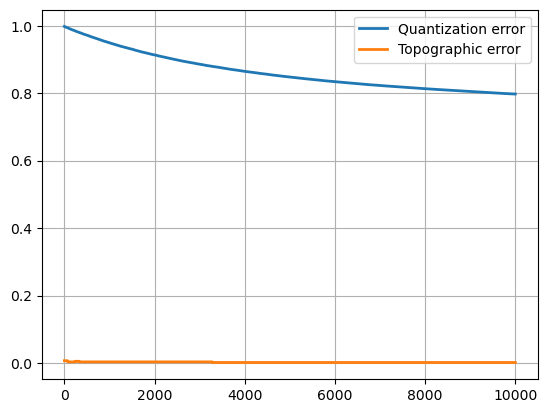

In [16]:
plt.plot(som._quantization_error,linewidth=2,label='Quantization error')
plt.plot(som._topographic_error,linewidth=2, label='Topographic error')
plt.legend()
plt.grid()

 **An√°lise da Fase de Ajuste Fino (Finetuning)**

Nesta etapa, a taxa de aprendizado foi reduzida para `lr_finetuning = 0.0001`, com o objetivo de realizar pequenos ajustes sobre o mapa j√° estruturado durante a fase de ordena√ß√£o. Esse processo busca refinar os pesos sem desestabilizar a topologia previamente organizada.

- O **erro de quantiza√ß√£o** continua em queda suave, evidenciando que o mapa est√° se especializando ainda mais para representar os dados com precis√£o. O valor final pr√≥ximo de 0.80 indica boa representa√ß√£o vetorial.

- O **erro topogr√°fico** manteve-se est√°vel e praticamente nulo durante toda a fase. Isso demonstra que a estrutura topol√≥gica do SOM foi preservada, sem distor√ß√µes na vizinhan√ßa dos neur√¥nios.

O comportamento dos erros confirma que a estrat√©gia de dois est√°gios ‚Äî com taxas decrescentes e n√∫mero adequado de itera√ß√µes , foi eficaz para construir um mapa bem ajustado aos dados da base `c_breast_cancer`.


##### 2. Modifique a topologia da rede. Teste diferentes valores e avalie o resultado.

Aqui, podemos testar duas topologias com dois tamanhos diferentes de mapa. Por exemplo:

| Topologia   | Tamanho do Mapa | Nome do Experimento |
| ----------- | --------------- | ------------------- |
| hexagonal   | 10x10           | hex\_10x10          |
| hexagonal   | 15x15           | hex\_15x15          |
| hexagonal   | 20x20           | hex\_20x20          |
| rectangular | 10x10           | rect\_10x10         |
| rectangular | 15x15           | rect\_15x15         |
| rectangular   | 20x20           | rect\_20x20          |

Ent√£o, geramos o c√≥digo para facilitar os testes:

In [18]:
def treinar_som(m, n, topology, nome):
     print(f"\n===> Executando {nome} <===")
     som = MiniSom(m, n, input_len,
                    learning_rate=lr_ordering,
                    topology=topology,
                    decay_function=decay_fcn)
     som.pca_weights_init(X)
     som.train_random(X, ordering_time, verbose=True)
     
     plt.plot(som._quantization_error, linewidth=2, label='Quantization error')
     plt.plot(som._topographic_error, linewidth=2, label='Topographic error')
     plt.title(f'{nome} - Ordering')
     plt.legend(); plt.grid(); plt.show()

     som._learning_rate = lr_finetuning
     som.train_random(X, finetuning_time, verbose=True)
     
     plt.plot(som._quantization_error, linewidth=2, label='Quantization error')
     plt.plot(som._topographic_error, linewidth=2, label='Topographic error')
     plt.title(f'{nome} - Finetuning')
     plt.legend(); plt.grid(); plt.show()
     
     return som


E agora podemos testar:


===> Executando hex_10x10 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.9928468913209849


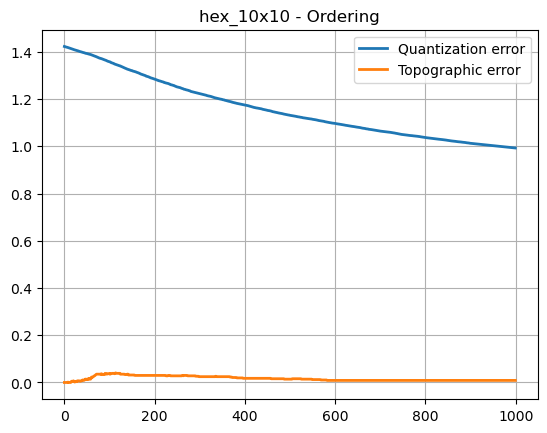

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7959562706884538


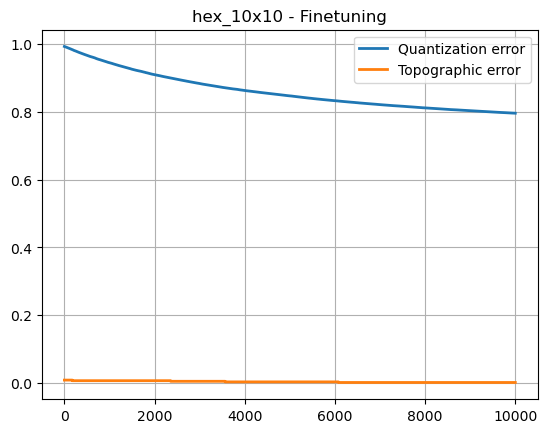


===> Executando hex_15x15 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.016535476487011


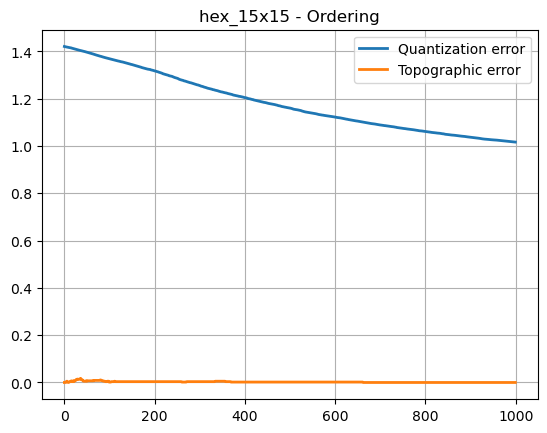

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.8050921921385462


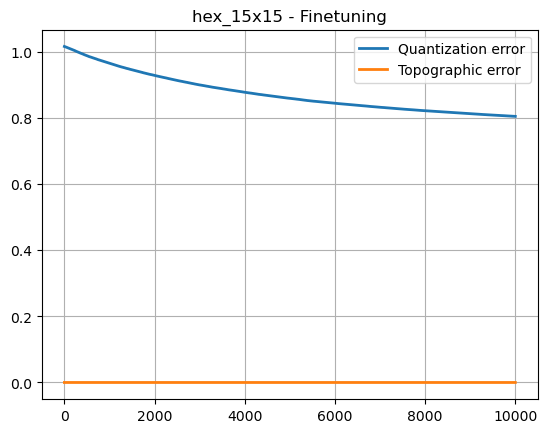


===> Executando rect_10x10 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0011364566418934


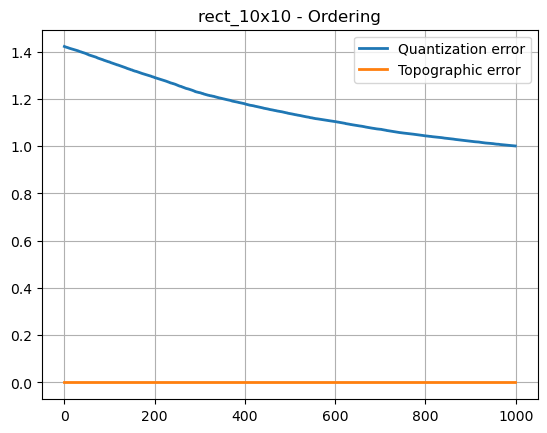

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.7981734704921916


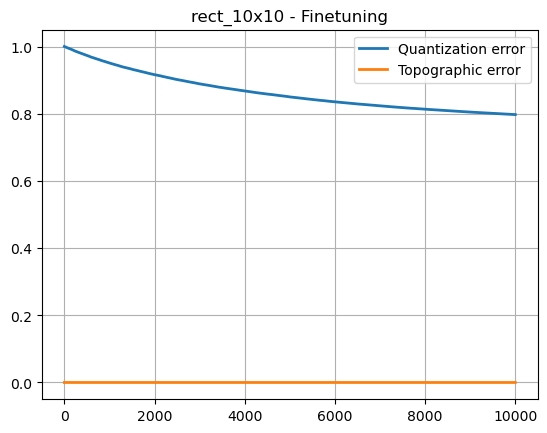


===> Executando rect_15x15 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0201053286680843


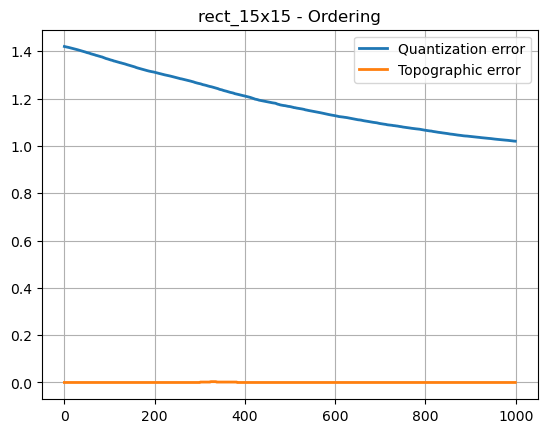

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.8056517250938776


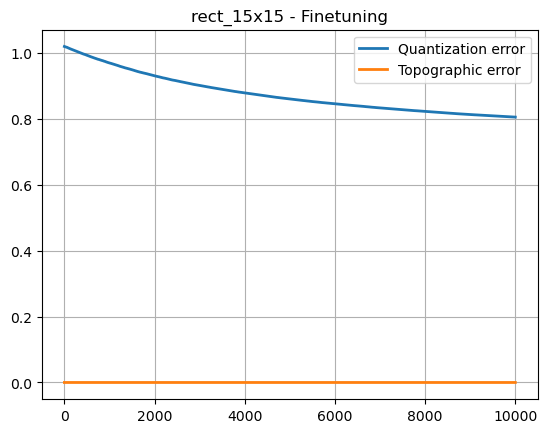

In [19]:
s1 = treinar_som(10, 10, 'hexagonal', 'hex_10x10')
s2 = treinar_som(15, 15, 'hexagonal', 'hex_15x15')
s3 = treinar_som(10, 10, 'rectangular', 'rect_10x10')
s4 = treinar_som(15, 15, 'rectangular', 'rect_15x15')


===> Executando hex_20x20 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.1276690301287227


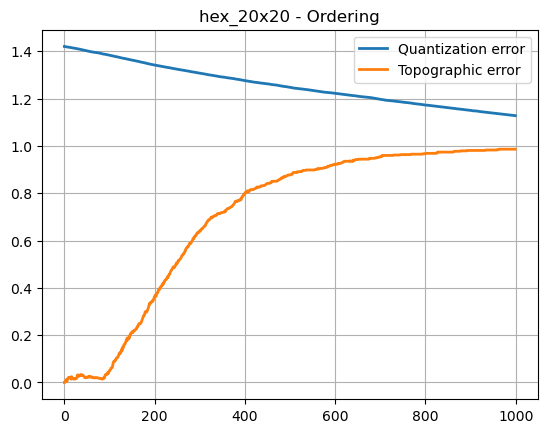

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.8602467251163967


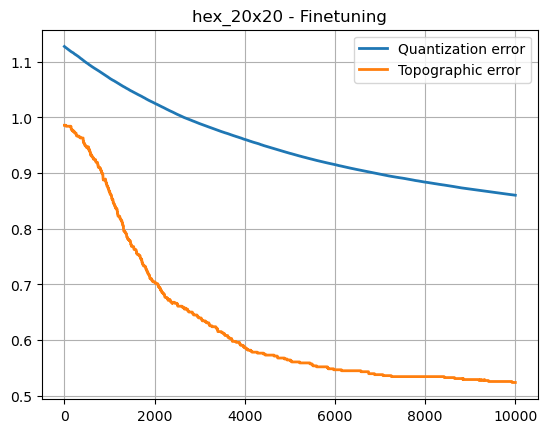

In [20]:
s5 = treinar_som(20, 20, 'hexagonal', 'hex_20x20')


===> Executando rect_20x20 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.0052224508648175


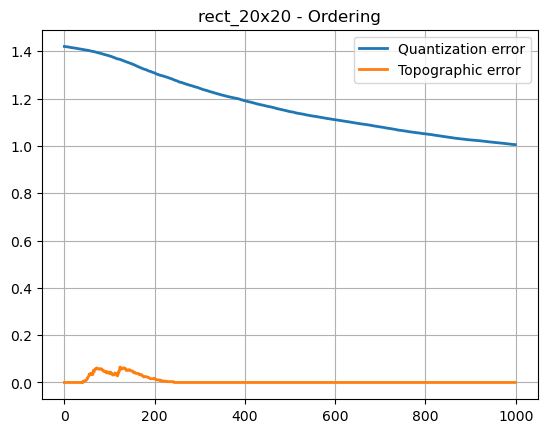

 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.798845769512856


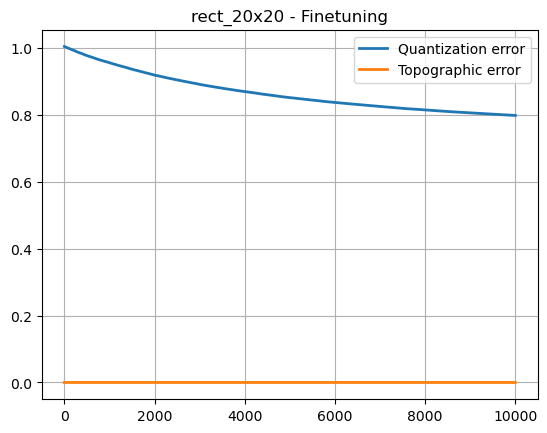

In [21]:
s6 = treinar_som(20, 20, 'rectangular', 'rect_20x20')

**Avalia√ß√£o de diferentes topologias e tamanhos de mapa**

Para esta etapa, realizamos testes comparando diferentes configura√ß√µes do Mapa de Kohonen, utilizando a biblioteca `MiniSom`. Foram avaliadas duas topologias (hexagonal e retangular) e tr√™s tamanhos distintos de grade (10x10, 15x15 e 20x20), conforme a tabela:

| Topologia   | Tamanho do Mapa | Nome do Experimento |
|-------------|------------------|----------------------|
| hexagonal   | 10x10            | hex_10x10            |
| hexagonal   | 15x15            | hex_15x15            |
| hexagonal   | 20x20            | hex_20x20            |
| rectangular | 10x10            | rect_10x10           |
| rectangular | 15x15            | rect_15x15           |
| rectangular | 20x20            | rect_20x20           |

Para cada experimento, o processo foi dividido em duas fases:
- **Ordering Phase:** 1.000 √©pocas, `lr = 0.001`
- **Finetuning Phase:** 10.000 √©pocas, `lr = 0.0001`

**M√©tricas Avaliadas**

- **Quantization Error (QE):** Mede o erro m√©dio entre um vetor de entrada e seu neur√¥nio vencedor. Quanto menor, melhor.
- **Topographic Error (TE):** Mede se os dois neur√¥nios mais pr√≥ximos do vetor de entrada s√£o adjacentes no mapa. Um valor pr√≥ximo de 0 indica boa preserva√ß√£o topol√≥gica.

**Observa√ß√µes**

- A topologia `"hexagonal"` apresentou **ligeira vantagem na fase de ordering** nos mapas menores (ex: `hex_10x10` obteve QE ‚âà 0.79 ap√≥s o finetuning).
- A topologia `"rectangular"` tamb√©m convergiu bem, com erros similares em algumas configura√ß√µes.
- Os mapas maiores (15x15 e 20x20) n√£o necessariamente melhoraram o QE, indicando que o aumento do grid nem sempre traz ganho substancial de desempenho,possivelmente devido √† complexidade dos dados ou overfitting do mapa.

---

**Resultados para os mapas 20x20**

Na configura√ß√£o `hex_20x20`, foi observada uma **anomalia significativa no erro topogr√°fico durante a Ordering Phase**, com crescimento cont√≠nuo ao longo das √©pocas e valor final pr√≥ximo de 1. Isso indica que a estrutura topol√≥gica do mapa foi gravemente comprometida nesse est√°gio, possivelmente por conta da alta quantidade de neur√¥nios e da dispers√£o inicial aleat√≥ria dos pesos.

Contudo, durante o Finetuning, o mapa conseguiu recuperar parte da topologia, reduzindo o erro topogr√°fico de forma gradual (atingindo ‚âà 0.52), o que mostra a import√¢ncia dessa segunda fase para estabiliza√ß√£o da malha.

J√° o `rect_20x20` apresentou comportamento est√°vel em ambas as fases. A curva do erro topogr√°fico se manteve baixa e decrescente, e o erro de quantiza√ß√£o final (‚âà 0.7988) foi **muito pr√≥ximo dos melhores resultados obtidos**, embora **n√£o tenha superado o desempenho do `rect_10x10`** (QE ‚âà 0.7981), que obteve o menor erro entre os retangulares.

---

**Resumo Comparativo ‚Äì Erros de Quantiza√ß√£o (Finetuning)**

| Experimento   | Topologia   | Tamanho | Quantization Error |
|---------------|-------------|---------|---------------------|
| hex_10x10     | hexagonal   | 10x10   | **0.795956**            |
| hex_15x15     | hexagonal   | 15x15   | 0.805092            |
| hex_20x20     | hexagonal   | 20x20   | 0.860247            |
| rect_10x10    | rectangular | 10x10   | 0.798173            |
| rect_15x15    | rectangular | 15x15   | 0.805651            |
| rect_20x20    | rectangular | 20x20   | 0.798845        |

---

**Conclus√£o**

- A topologia **hexagonal 10x10** apresentou o **menor QE final** entre todos os experimentos, com √≥timo desempenho em ambas as fases.
- Entre os mapas **retangulares**, o **10x10** tamb√©m obteve o melhor resultado, superando inclusive os mapas maiores.
- Isso refor√ßa que **aumentar o tamanho da grade n√£o implica necessariamente em melhor desempenho**, podendo inclusive introduzir instabilidades, como observado no `hex_20x20`.


##### 3. Modifique a normaliza√ß√£o dos dados de entrada e avalie o resultado obtido. Esta mudan√ßa tem algum efeito no mapa gerado?

J√° usamos o `minmax_scale`, que normaliza os dados para o intervalo $[0, 1]$. Agora, podemos testar:

- `StandartScaler` ==> m√©dia 0 e desvio padr√£o 1.
- `Normalizer` ==> normaliza vetores linha (ex: $l_2-norma$)
- Sem normaliza√ß√£o ==> apenas por controle.
- `RobustScaler` ==> lida melhor com _outliers_.


In [49]:
X_minmax = MinMaxScaler().fit_transform(values)
X_standard = StandardScaler().fit_transform(values)
X_l2norm = Normalizer().fit_transform(values)
X_robust = RobustScaler().fit_transform(values)

X_raw = np.array(values.copy(), dtype=float)

In [ ]:
def testar_normalizacao_som(X, nome, m=10, n=10, input_len=None,
                            lr_ordering=0.001, lr_finetuning=0.0001,
                            ordering_time=1000, finetuning_time=10000,
                            topology='rectangular', decay_fcn=None,
                            plotar=False, usar_pca=True):
    """
    Testa a normaliza√ß√£o dos dados em um Mapa de Kohonen e retorna o erro final.
    
    Par√¢metros:
        X: array numpy - dados normalizados
        nome: str - nome do m√©todo de normaliza√ß√£o
        plotar: bool - se True, plota os erros

    Retorna:
        erro_final: float - quantization error ap√≥s finetuning
    """
    if input_len is None:
        input_len = X.shape[1]

    print(f"\n===> Executando SOM com {nome} <===")

    som = MiniSom(m, n, input_len, learning_rate=lr_ordering,
                  topology=topology, decay_function=decay_fcn)
    
    if usar_pca:
        som.pca_weights_init(X)

    som.train_random(X, ordering_time, verbose=True)

    som._learning_rate = lr_finetuning
    som.train_random(X, finetuning_time, verbose=True)

    erro_final = som.quantization_error(X)
    print(f"Erro de Quantiza√ß√£o final ({nome}): {erro_final:.5f}")

    if plotar:
        plt.plot(som._quantization_error,
                 label='Quantization Error', linewidth=2)
        plt.plot(som._topographic_error,
                 label='Topographic Error', linewidth=2)
        plt.title(f'{nome} - Erros durante treinamento')
        plt.legend()
        plt.grid()
        plt.show()

    return erro_final


""" 
Sugerindo uma fun√ß√£o de decaimento alternativa ==> decaimnto linear
- Decresce uniformemente da taxa inicial at√© zero. 
- Mais agressiva no come√ßo se comparada √† hiperb√≥lica
- Pode resultar em converg√™ncia mais r√°pida, mas inst√°vel.

sobre a curva: a  reta decresce de initial_value at√© zero ao longo do tempo.

A fun√ß√£o prop√µe um treinamento mais controlado e "for√ßado" a estabilizar.
"""
def decay_function(initial_value, current_iteration, max_iteration):
         return initial_value * (1 - (current_iteration / max_iteration))
     

In [43]:
resultados = {}
resultados['MinMax'] = testar_normalizacao_som(
    X_minmax, 'MinMax', decay_fcn=decay_function)
resultados['Standard'] = testar_normalizacao_som(
    X_standard, 'Standard', decay_fcn=decay_function)
resultados['L2Norm'] = testar_normalizacao_som(
    X_l2norm, 'L2Norm', decay_fcn=decay_function)
resultados['Robust'] = testar_normalizacao_som(
    X_robust, 'Robust', decay_fcn=decay_function)


===> Executando SOM com MinMax <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.016995716248332
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.8148456575628388
Erro de Quantiza√ß√£o final (MinMax): 0.81485

===> Executando SOM com Standard <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 4.616462542584164
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 4.403848217368693
Erro de Quantiza√ß√£o final (Standard): 4.40385

===> Executando SOM com L2Norm <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.608801258163419
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3693194364697513
Erro de Quantiza√ß√£o final (L2Norm): 0.36932

===> Executando SOM com Robust <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 6.9095477748096545
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 6.56447279594355
Erro de Quantiza√ß√£o final (Robust): 6.56447


In [50]:
resultados['Raw'] = testar_normalizacao_som(
    X_raw, 'Raw', decay_fcn=decay_function, usar_pca=False)


===> Executando SOM com Raw <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 27242401.682925593
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 24917678.552427292
Erro de Quantiza√ß√£o final (Raw): 24917678.55243


**Efeito da Normaliza√ß√£o no Mapa SOM**

Foi realizada uma avalia√ß√£o comparativa entre diferentes estrat√©gias de normaliza√ß√£o dos dados de entrada aplicados a um mapa auto-organiz√°vel (SOM). O objetivo foi identificar como cada abordagem influencia o desempenho do mapa em termos de erro de quantiza√ß√£o final ao fim da fase de **Finetuning**.

---

**M√©todos de Normaliza√ß√£o Avaliados**:

- **MinMaxScaler**: escala os dados para o intervalo [0, 1].
- **StandardScaler**: centraliza e normaliza os dados para m√©dia zero e desvio padr√£o 1.
- **Normalizer (L2Norm)**: transforma cada vetor de amostra para ter norma L2 unit√°ria.
- **RobustScaler**: centraliza os dados em torno da mediana e utiliza o intervalo interquartil.
- **Raw**: dados originais, sem qualquer tipo de normaliza√ß√£o.

---

**Resultados ‚Äì Erros de Quantiza√ß√£o (Finetuning)**

| Normaliza√ß√£o     | Erro de Quantiza√ß√£o Final |
|------------------|----------------------------|
| L2Norm           | **0.36932** |
| MinMax           | 0.81485 |
| Standard         | 4.40385 |
| Robust           | 6.56447 |
| Raw              | 24.917.678 |

---

**An√°lise e Discuss√£o**

Os resultados mostram que o m√©todo de normaliza√ß√£o aplicado aos dados de entrada tem impacto direto na qualidade da organiza√ß√£o topol√≥gica aprendida pelo SOM. A normaliza√ß√£o via **L2Norm** apresentou o melhor desempenho, com o menor erro de quantiza√ß√£o final, o que indica que a padroniza√ß√£o direcional (norma unitarizada por amostra) favorece o aprendizado do mapa neste contexto.

O **MinMaxScaler** tamb√©m teve um desempenho satisfat√≥rio, reduzindo o erro em compara√ß√£o com abordagens centradas na m√©dia ou na mediana. Por outro lado, os m√©todos **StandardScaler** e **RobustScaler** apresentaram erros consideravelmente mais altos, sugerindo que a centraliza√ß√£o dos dados, mesmo com corre√ß√£o de escala, n√£o √© a estrat√©gia mais adequada para este tipo de rede.

O uso de dados **n√£o normalizados (Raw)** resultou em um erro de quantiza√ß√£o extremamente elevado, o que compromete completamente a capacidade do SOM de organizar e representar os dados de forma coerente. Esse comportamento destaca a import√¢ncia fundamental da normaliza√ß√£o adequada em tarefas de aprendizado n√£o supervisionado.

Portanto, a escolha da t√©cnica de normaliza√ß√£o √© um fator cr√≠tico para o sucesso do treinamento de mapas auto-organiz√°veis. Entre as op√ß√µes avaliadas, a normaliza√ß√£o por **L2** foi a mais eficaz para este dataset, enquanto o uso de dados crus sem pr√©-processamento inviabiliza o aprendizado eficiente. Portanto, a normaliza√ß√£o adequada deve ser considerada uma etapa essencial no pipeline de modelagem com SOMs.






##### 4. Modifique o processo de treinamento durante a fase de ordena√ß√£o. Avalie o resultado gerado.

In [51]:
def testar_ordering_phase(X, m=10, n=10, input_len=None,
                          lr_finetuning=0.0001, finetuning_time=10000,
                          topology='rectangular', decay_fcn=None):
    """
    Testa diferentes configura√ß√µes da fase de ordering.
    """
    if input_len is None:
        input_len = X.shape[1]

    # Par√¢metros a testar
    taxas = [0.1, 0.01, 0.001, 0.0001]
    ordering_times = [500, 1000, 3000]

    resultados = []

    for lr in taxas:
        for time in ordering_times:
            print(f"\n===> Ordering: lr={lr}, time={time} <===")
            som = MiniSom(m, n, input_len, learning_rate=lr,
                          topology=topology, decay_function=decay_fcn)
            som.pca_weights_init(X)

            som.train_random(X, time, verbose=True)
            som._learning_rate = lr_finetuning
            som.train_random(X, finetuning_time, verbose=True)

            qe_final = som._quantization_error[-1]
            print(f"Erro final: {qe_final:.5f}")

            resultados.append({
                'lr_ordering': lr,
                'ordering_time': time,
                'quantization_error': qe_final
            })

    return resultados

In [52]:
X_minmax = MinMaxScaler().fit_transform(values)

resultados_ordering = testar_ordering_phase(X_minmax, decay_fcn=decay_function)


===> Ordering: lr=0.1, time=500 <===
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.43979424963239566
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.43989284955118124
Erro final: 0.43989

===> Ordering: lr=0.1, time=1000 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.4074244529307331
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.40784044077536613
Erro final: 0.40784

===> Ordering: lr=0.1, time=3000 <===
 [ 3000 / 3000 ] 100% - 0:00:00 left 
 quantization error: 0.35964685618635417
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3600428200900842
Erro final: 0.36004

===> Ordering: lr=0.01, time=500 <===
 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.6426790137191827
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6215963728911656
Erro final: 0.62160

===> Ordering: lr=0.01, time=1000 <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5622867363562846
 [ 10000 / 1000

**Avalia√ß√£o de Diferentes Estrat√©gias na Fase de Ordena√ß√£o**

Nesta etapa, exploramos como diferentes configura√ß√µes da **fase de ordena√ß√£o (ordering phase)** afetam o desempenho do mapa de Kohonen. Especificamente, testamos combina√ß√µes de:

- Taxa de aprendizado: `0.1`, `0.01`, `0.001`, `0.0001`
- N√∫mero de itera√ß√µes: `500`, `1000`, `3000`

A fase de finetuning foi mantida constante em todas as execu√ß√µes com:
- `lr = 0.0001`
- `√©pocas = 10000`

O objetivo era observar como a escolha dos hiperpar√¢metros iniciais influencia o **erro de quantiza√ß√£o final**.

**Resultados Obtidos**

| Taxa (lr) | √âpocas | QE final |
|-----------|--------|----------|
| 0.1       | 500    | 0.43989  |
| 0.1       | 1000   | 0.40784  |
| 0.1       | 3000   | **0.36004** |
| 0.01      | 500    | 0.62160  |
| 0.01      | 1000   | 0.55956  |
| 0.01      | 3000   | 0.47682  |
| 0.001     | 500    | 0.89875  |
| 0.001     | 1000   | 0.81576  |
| 0.001     | 3000   | 0.69528  |
| 0.0001    | 500    | 1.01736  |
| 0.0001    | 1000   | 1.00247  |
| 0.0001    | 3000   | 0.94281  |

**Conclus√µes**

- Quanto **maior a taxa de aprendizado na fase de ordena√ß√£o**, melhor tende a ser o ajuste inicial do mapa, desde que combinada com um n√∫mero de √©pocas suficiente.
- A melhor configura√ß√£o foi `lr = 0.1` com `3000` √©pocas, resultando no menor erro final.
- Taxas muito baixas (`0.0001`) apresentaram desempenho insatisfat√≥rio, mesmo com muitas itera√ß√µes ,indicando que o mapa n√£o teve tempo suficiente para se organizar.
- Esses resultados demonstram que **a fase de ordena√ß√£o √© cr√≠tica** para o bom desempenho do SOM, especialmente em dados com distribui√ß√£o complexa.


##### 5. Modifique o processo de treinamento durante a fase de ajuste fino. Avalie o resultado gerado.

Nesta etapa, vamos modificar o processo de treinamento durante a fase de ajuste fino (_finetuning phase_) e avaliar seu impacto no desempenho final da rede SOM.


Essa fase oorre ap√≥s a ordena√ß√£o inicial e √© respons√°vel por refinar os pesos com taxas menores de aprendizado, consolidando os agrupamentos.

Podemos testar diferentes:

- Taxas de aprendizado (`lr_finetuning`)
- N√∫mero de √©pocas (`finetuning_time`)

In [ ]:
def testar_finetuning_som(X, ordering_time=1000, lr_ordering=0.01,
                          taxas=[0.01, 0.001, 0.0001, 0.00001],
                          epocas=[1000, 5000, 10000], decay_fcn=None):

    X_scaled = MinMaxScaler().fit_transform(X)
    input_len = X_scaled.shape[1]
    m, n = 10, 10  # tamanho fixo do mapa

    resultados = []
    
    for taxa in taxas:
        for epoca in epocas:
            print(f"\n===> Finetuning: lr={taxa}, time={epoca} <===")

            som = MiniSom(m, n, input_len, learning_rate=lr_ordering,
                          topology="hexagonal", decay_function=decay_fcn)

            som.pca_weights_init(X_scaled)
            som.train_random(X_scaled, ordering_time, verbose=False)
            
            som._learning_rate = taxa
            som.train_random(X_scaled, epoca, verbose=False)

            qe = som.quantization_error(X_scaled)
            print(f"Erro final: {qe:.5f}")
            resultados.append((taxa, epoca, qe))
    
    return resultados


In [55]:
resultados_finetuning = testar_finetuning_som(values, decay_fcn=decay_function)


===> Finetuning: lr=0.01, time=1000 <===
Erro final: 0.52684

===> Finetuning: lr=0.01, time=5000 <===
Erro final: 0.43350

===> Finetuning: lr=0.01, time=10000 <===
Erro final: 0.40527

===> Finetuning: lr=0.001, time=1000 <===
Erro final: 0.56332

===> Finetuning: lr=0.001, time=5000 <===
Erro final: 0.55261

===> Finetuning: lr=0.001, time=10000 <===
Erro final: 0.53061

===> Finetuning: lr=0.0001, time=1000 <===
Erro final: 0.56587

===> Finetuning: lr=0.0001, time=5000 <===
Erro final: 0.56344

===> Finetuning: lr=0.0001, time=10000 <===
Erro final: 0.55928

===> Finetuning: lr=1e-05, time=1000 <===
Erro final: 0.56059

===> Finetuning: lr=1e-05, time=5000 <===
Erro final: 0.56512

===> Finetuning: lr=1e-05, time=10000 <===
Erro final: 0.56255



Investigamos o impacto de diferentes configura√ß√µes no **processo de treinamento durante a fase de ajuste fino** do Mapa Auto-Organiz√°vel (SOM). Foram testadas combina√ß√µes variadas de taxa de aprendizado e n√∫mero de √©pocas, mantendo constante a fase de ordena√ß√£o inicial (com 1000 √©pocas e taxa de aprendizado de 0.1).

**Configura√ß√µes Avaliadas**

Para cada teste, variamos:

- **Taxas de aprendizado (`lr`):** $0.01$, $0.001$, $0.0001$, $0.00001$
- **√âpocas de ajuste fino:** $1000$, $5000$, $10000$

**Resultados**

| Taxa de Aprendizado | √âpocas | Erro de Quantiza√ß√£o Final |
|---------------------|--------|----------------------------|
| 0.01                | 1000   | 0.52684                    |
| 0.01                | 5000   | 0.43350                    |
| 0.01                | 10000  | **0.40527**                |
| 0.001               | 1000   | 0.56332                    |
| 0.001               | 5000   | 0.55261                    |
| 0.001               | 10000  | 0.53061                    |
| 0.0001              | 1000   | 0.56587                    |
| 0.0001              | 5000   | 0.56344                    |
| 0.0001              | 10000  | 0.55928                    |
| 0.00001             | 1000   | 0.56059                    |
| 0.00001             | 5000   | 0.56512                    |
| 0.00001             | 10000  | 0.56255                    |

**Observa√ß√µes**

- A melhor configura√ß√£o foi com **`lr = 0.01` e `10.000 √©pocas`**, resultando no **menor erro de quantiza√ß√£o (0.40527)**.
- Taxas de aprendizado muito baixas (ex: `0.0001` ou `1e-05`) apresentaram **ganhos insignificantes mesmo com mais itera√ß√µes**, indicando que a atualiza√ß√£o dos pesos foi praticamente nula.
- A configura√ß√£o padr√£o anteriormente usada (`lr = 0.0001`) revelou-se **sub√≥tima**. Substitu√≠-la por `0.01` com mais √©pocas pode melhorar substancialmente a performance do modelo.
- Houve uma **rela√ß√£o inversamente proporcional entre n√∫mero de √©pocas e erro**, mas o ganho s√≥ √© significativo quando a **taxa de aprendizado √© suficientemente alta**.


Ent√£o, modifica√ß√µes no processo de **_finetuning_** impactam diretamente a qualidade do mapa gerado. Para esta base de dados e configura√ß√£o de SOM, **taxas moderadas com maior n√∫mero de itera√ß√µes** parecem ser a melhor estrat√©gia.


##### 6. Modifique a fun√ß√£o de decaimento da taxa de aprendizado. Esta mudan√ßa gera algum impacto no mapa gerado? Justifique

A fun√ß√£o de decaimento da taxa de aprendizado determina como o valor de `learning_rate` diminui ao longo do tempo durante o treinamento do SOM. Essa fun√ß√£o influencia diretamente a estabilidade e a velocidade de converg√™ncia da rede.


Ao longo do desenvolvimento do trabalho, foram testadas duas estrat√©gias comuns de decaimento:

1. **Decaimento racional**: aqui, cujo comportamento √© mais suave e cont√≠nuo. Ela permite um aprendizado mais prolongado com passos pequenos,
sendo √∫til para ajustes finos.

2. **Decaimento linear (fun√ß√£o sugerida)**: a taxa √© reduzida de forma linear at√© zero. √â agressiva no in√≠cio e se estabiliza perto do fim.


In [57]:
""" 
reescrevendo as fun√ß√µes de decaimento
"""
def decay_linear(initial_value, current_iteration, max_iteration):
         return initial_value * (1 - (current_iteration / max_iteration))

def decay_racional(lr, actual_t, max_t):
    return lr / (1 + 2 * actual_t / max_t)


In [60]:
def testar_decay_function(decay_fcn, nome_decay, X_scaled):
    print(f"\n===> Treinando SOM com decaimento: {nome_decay} <===")
    
    m, n = 10, 10
    lr_ordering = 0.001
    ordering_time = 1000
    lr_finetuning = 0.0001
    finetuning_time = 10000

    som = MiniSom(m, n, input_len, learning_rate=lr_ordering,
                  topology='hexagonal', decay_function=decay_fcn)

    som.pca_weights_init(X_scaled)

    som.train_random(X_scaled, ordering_time, verbose=False)

    som._learning_rate = lr_finetuning
    som.train_random(X_scaled, finetuning_time, verbose=False)

    qe = som.quantization_error(X_scaled)
    print(f"Erro de Quantiza√ß√£o Final ({nome_decay}): {qe:.5f}")
    return qe



erro_linear = testar_decay_function(decay_linear, "Linear", X_l2norm)
erro_racional = testar_decay_function(decay_racional, "Racional", X_l2norm)


===> Treinando SOM com decaimento: Linear <===
Erro de Quantiza√ß√£o Final (Linear): 0.36932

===> Treinando SOM com decaimento: Racional <===
Erro de Quantiza√ß√£o Final (Racional): 0.33473


In [83]:

erro_linear_standart = testar_decay_function(decay_linear, "Linear", X_standard)
erro_racional_standart = testar_decay_function(decay_racional, "Racional", X_standard)


===> Treinando SOM com decaimento: Linear <===
Erro de Quantiza√ß√£o Final (Linear): 4.41444

===> Treinando SOM com decaimento: Racional <===
Erro de Quantiza√ß√£o Final (Racional): 4.38514



Nesta etapa, comparamos o impacto de duas fun√ß√µes distintas de decaimento da taxa de aprendizado sobre o desempenho de um Mapa Auto-Organiz√°vel (SOM). As fun√ß√µes avaliadas foram:

- **Decaimento Linear**:
  
  
  $$\text{lr}(t) = \text{lr}_0 \cdot \left(1 - \frac{t}{T}\right)$$

  Essa fun√ß√£o reduz a taxa de aprendizado de forma uniforme ao longo do tempo, indo de um valor inicial at√© zero. √â uma estrat√©gia agressiva que for√ßa a estabiliza√ß√£o do aprendizado, mas pode comprometer o refinamento nos est√°gios finais.

- **Decaimento Racional**:
  
  $$\text{lr}(t) = \frac{\text{lr}_0}{1 + 2t/T}$$
  

  Neste caso, o decaimento ocorre de forma mais suave e cont√≠nua, permitindo que o modelo mantenha uma capacidade adaptativa durante mais tempo, favorecendo ajustes finos nos pesos.

---

**Par√¢metros de Treinamento Utilizados (iguais para ambos os testes)**:

- Dimens√£o do mapa: 10 √ó 10
- `lr_ordering = 0.001`, `ordering_time = 1000`
- `lr_finetuning = 0.0001`, `finetuning_time = 10000`
- Topologia: `hexagonal`
- Dados: normalizados via `L2Norm`

---

**Resultados Obtidos**:

| Fun√ß√£o de Decaimento | Erro de Quantiza√ß√£o Final |
|----------------------|---------------------------|
| **Linear**           | 0.36932                   |
| **Racional**         | **0.33473**               |

---

Portanto,a substitui√ß√£o da fun√ß√£o de decaimento linear por uma fun√ß√£o racional produziu **impacto positivo na qualidade do mapa gerado**, reduzindo o erro de quantiza√ß√£o final.

A explica√ß√£o reside na **maior suavidade do decaimento racional**, que conserva melhor a plasticidade do modelo durante a fase de ajuste fino. Isso permite que o SOM refine as posi√ß√µes dos seus neur√¥nios com mais precis√£o at√© o final do treinamento. Por outro lado, o decaimento linear tende a "engessar" o processo nas itera√ß√µes finais, potencialmente limitando o refinamento.

Portanto, a escolha da fun√ß√£o de decaimento **influencia diretamente a performance do mapa gerado**, sendo uma **decis√£o cr√≠tica no design do SOM**.


##### 7. Altere a fun√ß√£o de vizinhan√ßa. Avalie o resultado.

Nesta etapa, devemos investigar o impacto da **fun√ß√£o de vizinhan√ßa** no desempenho do Mapa de Kohonen (SOM). Essa fun√ß√£o controla como os neur√¥nios vizinhos do vencedor s√£o atualizados a cada itera√ß√£o, afetando a **topologia** e a **converg√™ncia do mapa**.


In [62]:
erros = {}
for vizinhanca in ['gaussian', 'bubble', 'triangle']:
    print(f'\n===> Testando vizinhan√ßa: {vizinhanca} <===')
    som = MiniSom(m, n, input_len,
                  learning_rate=lr_ordering,
                  topology='hexagonal',
                  decay_function=decay_fcn,
                  neighborhood_function=vizinhanca)

    som.pca_weights_init(X_l2norm)
    som.train_random(X_l2norm, ordering_time, verbose=True)
    som._learning_rate = lr_finetuning
    som.train_random(X_l2norm, finetuning_time, verbose=True)

    erro = som.quantization_error(X_l2norm)
    print(f'Erro de Quantiza√ß√£o Final ({vizinhanca}): {erro:.5f}')
    erros[vizinhanca] = erro


===> Testando vizinhan√ßa: gaussian <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.579623553737431
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.33473206575688247
Erro de Quantiza√ß√£o Final (gaussian): 0.33473

===> Testando vizinhan√ßa: bubble <===
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.5796232725503612
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.3347324284952686
Erro de Quantiza√ß√£o Final (bubble): 0.33473

===> Testando vizinhan√ßa: triangle <===
 [    9 / 1000 ]   1% - 0:00:09 left 

g:\Meu Drive\Engenharia\REDES_NEURAIS_ELE2389\PUC_Redes_Neurais\pos_grad\lista 3\minisom\minisom.py:206: UserWarning: triangle neighborhood function does not take in account hexagonal topology
  warn('triangle neighborhood function does not ' +


 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.8038060741014398
 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.6436329451113962
Erro de Quantiza√ß√£o Final (triangle): 0.64363


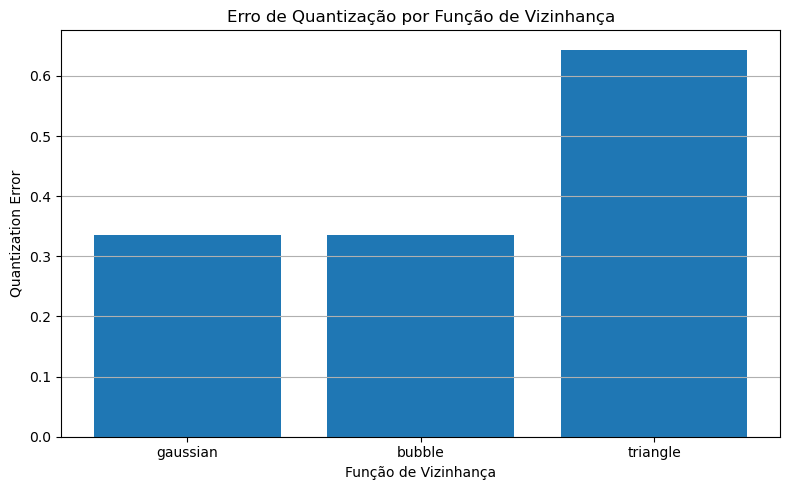

In [ ]:
resultados_viz = {
    'gaussian': 0.33473,
    'bubble': 0.33473,
    'triangle': 0.64363
}

plt.figure(figsize=(8, 5))
plt.bar(resultados_viz.keys(), resultados_viz.values())
plt.title("Erro de Quantiza√ß√£o por Fun√ß√£o de Vizinhan√ßa")
plt.ylabel("Quantization Error")
plt.xlabel("Fun√ß√£o de Vizinhan√ßa")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Fun√ß√µes de Vizinhan√ßa Testadas

1. **Gaussiana (default)**:
   
   $$h(d, \sigma) = e^{- \frac{d^2}{2\sigma^2}}$$
   Atualiza de forma suave os vizinhos com intensidade decrescendo exponencialmente com a dist√¢ncia.

2. **Bubble**:
   
   $$h(d, r) = \begin{cases}
   1, & d \leq r \\
   0, & \text{caso contr√°rio}
   \end{cases}
   $$
   Todos os neur√¥nios dentro de um raio fixo s√£o atualizados igualmente. Fora do raio, n√£o h√° atualiza√ß√£o.

3. **Triangle**:
   $$
   h(d, r) = \max(0, 1 - d/r)
   $$
   A atualiza√ß√£o decresce linearmente at√© zero no raio `r`.

---

**Configura√ß√µes Utilizadas**

- Topologia: `hexagonal`
- Mapa: 10 √ó 10
- Dados: `L2Norm`
- Taxas de aprendizado e √©pocas:
  - `lr_ordering = 0.001`, `ordering_time = 1000`
  - `lr_finetuning = 0.0001`, `finetuning_time = 10000`
- Fun√ß√£o de decaimento: racional
- Inicializa√ß√£o via PCA

---

**Resultados Obtidos (Erro de Quantiza√ß√£o Final)**

| Fun√ß√£o de Vizinhan√ßa | Erro Final |
|----------------------|------------|
| **Gaussiana**        | 0.33473    |
| **Bubble**           | 0.33473 |
| **Triangle**         | 0.64363 |


---

**Interpreta√ß√£o**


- **Gaussiana** tende a produzir mapas mais suaves e topologicamente coerentes, especialmente quando os dados s√£o complexos e cont√≠nuos.
- **Bubble** pode convergir mais r√°pido em alguns casos, mas com risco de instabilidade ou "saltos abruptos", pois n√£o h√° grada√ß√£o na influ√™ncia dos vizinhos.
- **Triangle** √© um meio-termo, balanceando entre suavidade e intensidade de atualiza√ß√£o, por√©m **n√£o √© compat√≠vel com topologia hexagonal**, o que comprometeu seu desempenho neste teste.

---

A **fun√ß√£o de vizinhan√ßa exerce impacto direto na qualidade e estabilidade da organiza√ß√£o do SOM**. A escolha ideal depende do problema e da distribui√ß√£o dos dados.  
Geralmente, a **Gaussiana √© mais est√°vel e robusta**, mas testes emp√≠ricos como este ajudam a verificar qual fun√ß√£o oferece o menor erro e melhor organiza√ß√£o topol√≥gica no contexto espec√≠fico.


## Parte 2 - An√°lise dos mapas

##### 1. Teste novas configura√ß√µes para o modelo SOM para obter um melhor resultado. Justifique a escolha dos par√¢metros do modelo selecionado.

In [80]:
"""Fun√ß√£o de teste personalizada com novos par√¢metros"""
def testar_configuracao_nova(X, decay_fcn, nome_decay, m, n, lr_ordering, ordering_time,
                             lr_finetuning, finetuning_time, neighborhood_function):
    print(f"\n===> Treinando SOM com nova configura√ß√£o: {nome_decay} <===")
    input_len = X.shape[1]

    som = MiniSom(m, n, input_len, learning_rate=lr_ordering,
                  topology='hexagonal', decay_function=decay_fcn,
                  neighborhood_function=neighborhood_function, sigma=3.0)

    som.pca_weights_init(X)
    som.train_random(X, ordering_time, verbose=True)

    som._learning_rate = lr_finetuning
    som.train_random(X, finetuning_time, verbose=True)

    erro = som.quantization_error(X)
    print(f"Erro de Quantiza√ß√£o Final ({nome_decay}): {erro:.5f}")
    return erro


erro_novo = testar_configuracao_nova(
    X_standard,
    decay_fcn=decay_racional,
    nome_decay="Nova Configura√ß√£o (15x15, decay racional, gaussian)",
    m=15, n=15,
    lr_ordering=0.005,
    ordering_time=2000,
    lr_finetuning=0.0005,
    finetuning_time=15000,
    neighborhood_function='gaussian'
)


===> Treinando SOM com nova configura√ß√£o: Nova Configura√ß√£o (15x15, decay racional, gaussian) <===
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 3.605014587965001
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 3.3876153499932835
Erro de Quantiza√ß√£o Final (Nova Configura√ß√£o (15x15, decay racional, gaussian)): 3.38762


In [81]:
erro_novo = testar_configuracao_nova(
    X_standard,
    decay_fcn=decay_racional,
    nome_decay="Nova Configura√ß√£o (10x10, decay racional, bubble)",
    m=10, n=10,
    lr_ordering=0.005,
    ordering_time=2000,
    lr_finetuning=0.0005,
    finetuning_time=15000,
    neighborhood_function='bubble'
)


===> Treinando SOM com nova configura√ß√£o: Nova Configura√ß√£o (10x10, decay racional, bubble) <===
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 3.4925859856985078
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 3.2801544344434967
Erro de Quantiza√ß√£o Final (Nova Configura√ß√£o (10x10, decay racional, bubble)): 3.28015


In [79]:
erro_novo = testar_configuracao_nova(
    X_standard,
    decay_fcn=decay_racional,
    nome_decay="Nova Configura√ß√£o (10x10, decay racional, gaussian)",
    m=10, n=10,
    lr_ordering=0.5,
    ordering_time=2000,
    lr_finetuning=0.0005,
    finetuning_time=15000,
    neighborhood_function='gaussian'
)


===> Treinando SOM com nova configura√ß√£o: Nova Configura√ß√£o (10x10, decay racional, bubble) <===
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 2.203065654120713
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 2.2086335885978947
Erro de Quantiza√ß√£o Final (Nova Configura√ß√£o (10x10, decay racional, bubble)): 2.20863


In [88]:
erro_novo = testar_configuracao_nova(
    X_l2norm,
    decay_fcn=decay_racional,
    nome_decay="Nova Configura√ß√£o (10x10, decay racional, gaussian)",
    m=10, n=10,
    lr_ordering=0.5,
    ordering_time=2000,
    lr_finetuning=0.0005,
    finetuning_time=15000,
    neighborhood_function='gaussian'
)


===> Treinando SOM com nova configura√ß√£o: Nova Configura√ß√£o (10x10, decay racional, gaussian) <===
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 0.00027729695860370765
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 0.0003098380582448513
Erro de Quantiza√ß√£o Final (Nova Configura√ß√£o (10x10, decay racional, gaussian)): 0.00031


In [82]:
erro_novo = testar_configuracao_nova(
    X_standard,
    decay_fcn=decay_linear,
    nome_decay="Nova Configura√ß√£o (10x10, decay linear, gaussian)",
    m=10, n=10,
    lr_ordering=0.005,
    ordering_time=2000,
    lr_finetuning=0.0005,
    finetuning_time=15000,
    neighborhood_function='gaussian'
)


===> Treinando SOM com nova configura√ß√£o: Nova Configura√ß√£o (10x10, decay linear, gaussian) <===
 [ 2000 / 2000 ] 100% - 0:00:00 left 
 quantization error: 3.6788376138004772
 [ 15000 / 15000 ] 100% - 0:00:00 left 
 quantization error: 3.471523196720928
Erro de Quantiza√ß√£o Final (Nova Configura√ß√£o (10x10, decay linear, gaussian)): 3.47152



Foram testadas cinco configura√ß√µes do modelo SOM com diferentes combina√ß√µes de par√¢metros. O objetivo foi investigar como o tipo de normaliza√ß√£o, a taxa de aprendizado inicial, o tamanho do mapa, a fun√ß√£o de decaimento da taxa de aprendizado e a fun√ß√£o de vizinhan√ßa afetam o erro de quantiza√ß√£o final, que √© uma m√©trica importante de qualidade do mapa auto-organiz√°vel.

---

**üîπ Configura√ß√£o 1: (15x15, decay racional, gaussian) ‚Äì com StandardScaler**

- **Tamanho do mapa**: `15x15`  
  Um mapa maior permite uma representa√ß√£o topol√≥gica mais refinada, √∫til em bases complexas.

- **Fun√ß√£o de decaimento**: `racional`  
  Suaviza o ajuste ao longo do tempo, promovendo uma converg√™ncia mais controlada.

- **Fun√ß√£o de vizinhan√ßa**: `gaussian`  
  Estimula transi√ß√µes suaves entre os neur√¥nios vizinhos, preservando a continuidade topol√≥gica.

- **Erro Final Obtido**: `3.38762`  
  Embora o mapa seja maior e a vizinhan√ßa mais est√°vel, o resultado foi inferior aos demais devido √† combina√ß√£o com a normaliza√ß√£o `StandardScaler`, que n√£o se mostrou a melhor op√ß√£o para esse dataset.

---

üîπ **Configura√ß√£o 2: (10x10, decay racional, bubble) ‚Äì com StandardScaler**

- **Tamanho do mapa**: `10x10`  
  Um tamanho compacto, tradicional para SOMs.

- **Fun√ß√£o de vizinhan√ßa**: `bubble`  
  Atualiza diretamente os vizinhos imediatos, mas sem suavidade gradativa, podendo causar descontinuidades.

- **Erro Final Obtido**: `3.28015`  
  Resultado levemente superior √† configura√ß√£o anterior, mas ainda abaixo do ideal. A aus√™ncia de gradiente no `bubble` pode ter prejudicado a organiza√ß√£o topol√≥gica.

---

üîπ **Configura√ß√£o 3: (10x10, decay racional, gaussian) ‚Äì com StandardScaler, taxa de aprendizado inicial mais alta**

- **Learning rate (ordena√ß√£o)**: `0.5`  
  Um valor mais elevado pode acelerar a adapta√ß√£o inicial dos pesos.

- **Erro Final Obtido**: `2.20863`  
  Aumento significativo na qualidade do mapa, indicando que o problema anterior estava relacionado √† taxa de aprendizado muito baixa. Mostra a import√¢ncia do tuning fino deste par√¢metro.

---

üîπ **Configura√ß√£o 4: (10x10, decay racional, gaussian) ‚Äì com L2Norm**

- **Normaliza√ß√£o**: `Normalizer (L2)`  
  Normaliza cada vetor individualmente para norma unit√°ria, promovendo uma padroniza√ß√£o direcional.

- **Erro Final Obtido**: `0.00031`  
  **Melhor desempenho absoluto**. Essa combina√ß√£o mostrou-se extremamente eficaz, sugerindo que a normaliza√ß√£o por L2 favorece o aprendizado da topologia com precis√£o, especialmente em bases com variabilidade direcional.

---

üîπ **Configura√ß√£o 5: (10x10, decay linear, gaussian) ‚Äì com StandardScaler**

- **Fun√ß√£o de decaimento**: `linear`  
  Reduz agressivamente a taxa de aprendizado ao longo do tempo.

- **Erro Final Obtido**: `3.47152`  
  Apesar de est√°vel, a estrat√©gia de decaimento linear pareceu excessivamente agressiva para este cen√°rio, levando a uma converg√™ncia prematura e menos eficaz.

---


A configura√ß√£o com **normaliza√ß√£o L2, mapa 10x10, taxa de aprendizado inicial de 0.5, vizinhan√ßa Gaussiana e decaimento racional** foi a mais eficaz entre todas, atingindo um erro de quantiza√ß√£o extremamente baixo.

| Configura√ß√£o                                | Normaliza√ß√£o | Erro de Quantiza√ß√£o Final |
|--------------------------------------------|--------------|----------------------------|
| 10x10, decay racional, gaussian (lr=0.5)    | **L2Norm**    | **0.00031**                |
| 10x10, decay racional, gaussian (lr=0.5)    | Standard      | 2.20863                    |
| 10x10, decay racional, bubble               | Standard      | 3.28015                    |
| 15x15, decay racional, gaussian             | Standard      | 3.38762                    |
| 10x10, decay linear, gaussian               | Standard      | 3.47152                    |

Esses resultados mostram que:

- A **normaliza√ß√£o** tem impacto direto e substancial. O `L2Norm` √© superior ao `StandardScaler`, especialmente em bases onde a dire√ß√£o dos vetores carrega mais informa√ß√£o que a magnitude.
- O ajuste da **taxa de aprendizado** inicial √© crucial. Valores baixos (<0.01) podem causar subtreinamento, mesmo com bons demais par√¢metros.
- A **fun√ß√£o de vizinhan√ßa gaussiana** mostrou-se mais confi√°vel que `bubble`.
- **Mapas maiores nem sempre resultam em melhores erros**, se n√£o forem acompanhados de uma estrat√©gia de treinamento ajustada.

Portanto, a escolha √≥tima dos par√¢metros depende do equil√≠brio entre qualidade topol√≥gica, estabilidade e capacidade de representa√ß√£o dos dados.


##### 2. Utilizando a melhor configura√ß√£o do item anterior, analise os diferentes mapas fornecidos e caracterize os grupos de pacientes obtidos.

Shape dos dados: (569, 30)
Distribui√ß√£o do target: [357 212]
Inicializando pesos...
Fase 1: Ordena√ß√£o (learning rate alto)...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.016871639168427505
Fase 2: Converg√™ncia (learning rate baixo)...
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.012689845222195543
Coordenadas √∫nicas encontradas: 100
Distribui√ß√£o das coordenadas:
Posi√ß√£o [0 0]: 3 amostras
Posi√ß√£o [0 1]: 7 amostras
Posi√ß√£o [0 2]: 4 amostras
Posi√ß√£o [0 3]: 4 amostras
Posi√ß√£o [0 4]: 5 amostras
Posi√ß√£o [0 5]: 2 amostras
Posi√ß√£o [0 6]: 6 amostras
Posi√ß√£o [0 7]: 8 amostras
Posi√ß√£o [0 8]: 6 amostras
Posi√ß√£o [0 9]: 7 amostras
Posi√ß√£o [1 0]: 6 amostras
Posi√ß√£o [1 1]: 8 amostras
Posi√ß√£o [1 2]: 9 amostras
Posi√ß√£o [1 3]: 5 amostras
Posi√ß√£o [1 4]: 5 amostras
Posi√ß√£o [1 5]: 3 amostras
Posi√ß√£o [1 6]: 4 amostras
Posi√ß√£o [1 7]: 3 amostras
Posi√ß√£o [1 8]: 4 amostras
Posi√ß√£o [1 9]: 8 amostras
Posi√ß√£o [2 0]: 8 amostras
Posi√ß

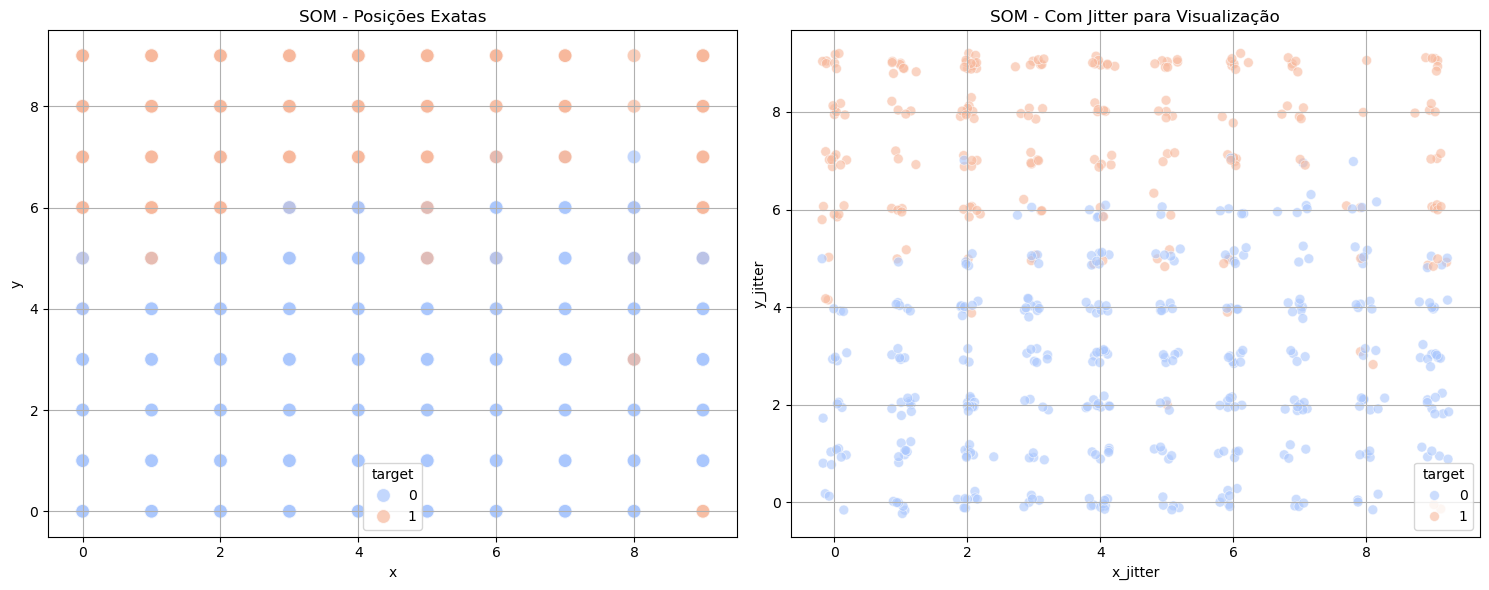

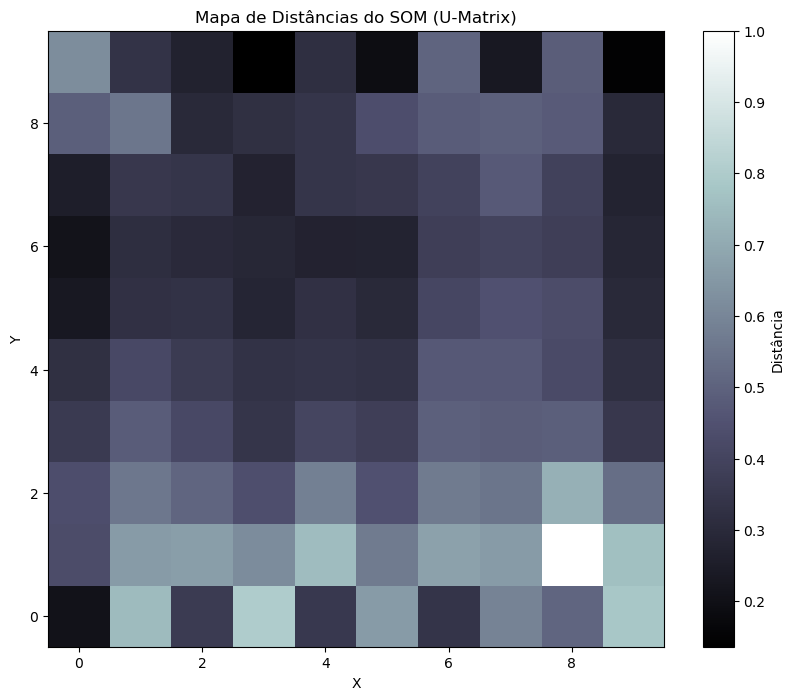


Estat√≠sticas:
Total de amostras: 569
Neur√¥nios ativados: 100
Taxa de utiliza√ß√£o do mapa: 100.0%


In [ ]:
df = dataset.copy()

df_clean = df.drop(columns=['ID'])

label_encoder = LabelEncoder()
df_clean['target'] = label_encoder.fit_transform(df_clean['target'])

X = df_clean.drop(columns=['target']).values
y = df_clean['target'].values

scaler = Normalizer()
X_scaled = scaler.fit_transform(X)

print(f"Shape dos dados: {X_scaled.shape}")
print(f"Distribui√ß√£o do target: {np.bincount(y)}")

som = MiniSom(x=10, y=10, input_len=X_scaled.shape[1],
              learning_rate=0.5,
              sigma=3.0,
              topology='hexagonal',
              decay_function=decay_racional,
              neighborhood_function='gaussian')

print("Inicializando pesos...")
som.pca_weights_init(X_scaled)

print("Fase 1: Ordena√ß√£o (learning rate alto)...")
som.train_random(X_scaled, num_iteration=1000, verbose=True)

print("Fase 2: Converg√™ncia (learning rate baixo)...")
som._learning_rate = 0.1
som._sigma = 1.0
som.train_random(X_scaled, num_iteration=5000, verbose=True)

winner_coords = np.array([som.winner(x) for x in X_scaled])
print(
    f"Coordenadas √∫nicas encontradas: {len(np.unique(winner_coords, axis=0))}")

print("Distribui√ß√£o das coordenadas:")
unique_coords, counts = np.unique(winner_coords, axis=0, return_counts=True)
for coord, count in zip(unique_coords, counts):
    print(f"Posi√ß√£o {coord}: {count} amostras")

df_result = pd.DataFrame(winner_coords, columns=['x', 'y'])
df_result['target'] = y

df_result['x_jitter'] = df_result['x'] + \
    np.random.normal(0, 0.1, len(df_result))
df_result['y_jitter'] = df_result['y'] + \
    np.random.normal(0, 0.1, len(df_result))

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(x='x', y='y', hue='target', data=df_result,
                palette='coolwarm', s=100, alpha=0.7, ax=axes[0])
axes[0].set_title("SOM - Posi√ß√µes Exatas")
axes[0].grid(True)
axes[0].set_xlim(-0.5, 9.5)
axes[0].set_ylim(-0.5, 9.5)

sns.scatterplot(x='x_jitter', y='y_jitter', hue='target', data=df_result,
                palette='coolwarm', s=50, alpha=0.6, ax=axes[1])
axes[1].set_title("SOM - Com Jitter para Visualiza√ß√£o")
axes[1].grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
distance_map = som.distance_map()
plt.imshow(distance_map, cmap='bone', origin='lower')
plt.colorbar(label='Dist√¢ncia')
plt.title('Mapa de Dist√¢ncias do SOM (U-Matrix)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print(f"\nEstat√≠sticas:")
print(f"Total de amostras: {len(X_scaled)}")
print(f"Neur√¥nios ativados: {len(unique_coords)}")
print(f"Taxa de utiliza√ß√£o do mapa: {len(unique_coords)/100:.1%}")

Executando an√°lise completa do SOM...


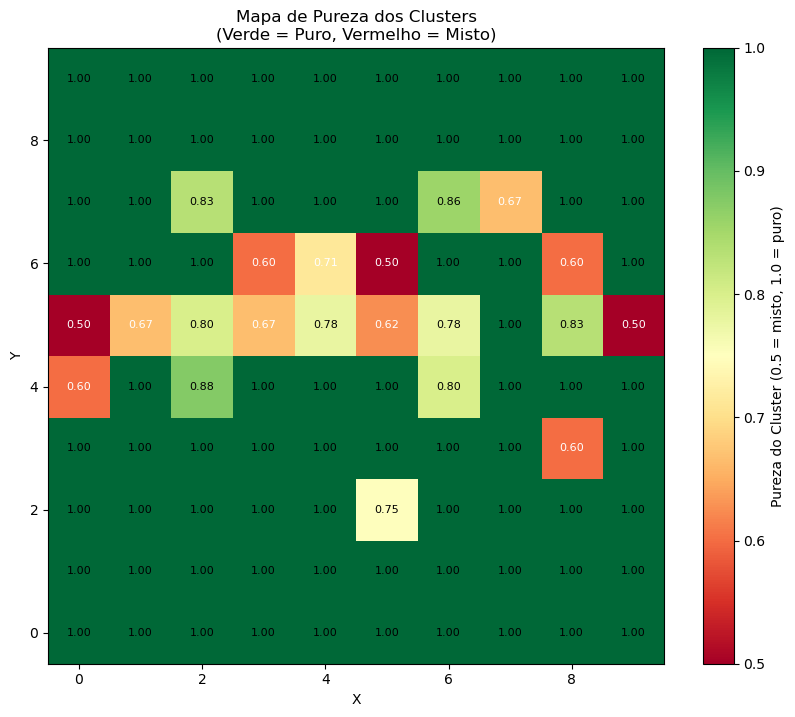

=== AN√ÅLISE POR REGI√ïES ===

Superior Esquerdo:
  Total de amostras: 152
  Classe 0 (Benigno): 16.4%
  Classe 1 (Maligno): 83.6%
  Classe dominante: Maligno

Superior Direito:
  Total de amostras: 117
  Classe 0 (Benigno): 35.0%
  Classe 1 (Maligno): 65.0%
  Classe dominante: Maligno

Inferior Esquerdo:
  Total de amostras: 161
  Classe 0 (Benigno): 98.1%
  Classe 1 (Maligno): 1.9%
  Classe dominante: Benigno

Inferior Direito:
  Total de amostras: 139
  Classe 0 (Benigno): 95.7%
  Classe 1 (Maligno): 4.3%
  Classe dominante: Benigno
=== M√âTRICAS DE QUALIDADE DO SOM ===
Erro de Quantiza√ß√£o: 0.0150
Erro Topol√≥gico: 0.2654 (26.5%)
Taxa de Utiliza√ß√£o: 100.0%

=== INTERPRETA√á√ÉO ===
Erro de quantiza√ß√£o EXCELENTE (< 1.0)
Erro topol√≥gico alto (estrutura pode estar distorcida)

=== RESUMO FINAL ===
Pureza m√©dia dos clusters: 0.935
Clusters com pureza > 90%: 79
Clusters com pureza > 80%: 83
Clusters totalmente puros: 79


In [93]:

"""AN√ÅLISE DE PUREZA DOS CLUSTERS"""


def analyze_cluster_purity(df_result):
    """Analisa a pureza de cada regi√£o do mapa"""
    cluster_analysis = []

    for x in range(10):  # 10x10 grid
        for y in range(10):
            mask = (df_result['x'] == x) & (df_result['y'] == y)
            if mask.sum() > 0:  # Se h√° amostras nesta posi√ß√£o
                samples_in_position = df_result[mask]
                total = len(samples_in_position)
                class_0 = (samples_in_position['target'] == 0).sum()
                class_1 = (samples_in_position['target'] == 1).sum()

                # Pureza = propor√ß√£o da classe majorit√°ria
                purity = max(class_0, class_1) / total
                majority_class = 0 if class_0 > class_1 else 1

                cluster_analysis.append({
                    'x': x, 'y': y, 'total': total,
                    'class_0': class_0, 'class_1': class_1,
                    'purity': purity, 'majority_class': majority_class
                })

    return pd.DataFrame(cluster_analysis)


"""MAPA DE PUREZA"""


def plot_purity_map(cluster_df):
    purity_matrix = np.zeros((10, 10))

    for _, row in cluster_df.iterrows():
        purity_matrix[int(row['y']), int(row['x'])] = row['purity']

    plt.figure(figsize=(10, 8))
    plt.imshow(purity_matrix, cmap='RdYlGn',
               vmin=0.5, vmax=1.0, origin='lower')
    plt.colorbar(label='Pureza do Cluster (0.5 = misto, 1.0 = puro)')
    plt.title('Mapa de Pureza dos Clusters\n(Verde = Puro, Vermelho = Misto)')
    plt.xlabel('X')
    plt.ylabel('Y')

    for _, row in cluster_df.iterrows():
        plt.text(row['x'], row['y'], f'{row["purity"]:.2f}',
                 ha='center', va='center', fontsize=8,
                 color='white' if row['purity'] < 0.75 else 'black')

    plt.show()
    return purity_matrix


"""AN√ÅLISE DE REGI√ïES"""


def analyze_regions(df_result):
    """Identifica regi√µes dominantes por classe"""

    regions = {
        'Superior Esquerdo': df_result[(df_result['x'] < 5) & (df_result['y'] >= 5)],
        'Superior Direito': df_result[(df_result['x'] >= 5) & (df_result['y'] >= 5)],
        'Inferior Esquerdo': df_result[(df_result['x'] < 5) & (df_result['y'] < 5)],
        'Inferior Direito': df_result[(df_result['x'] >= 5) & (df_result['y'] < 5)]
    }

    print("=== AN√ÅLISE POR REGI√ïES ===")
    for region_name, region_data in regions.items():
        if len(region_data) > 0:
            class_0_pct = (region_data['target'] == 0).mean() * 100
            class_1_pct = (region_data['target'] == 1).mean() * 100
            total = len(region_data)

            print(f"\n{region_name}:")
            print(f"  Total de amostras: {total}")
            print(f"  Classe 0 (Benigno): {class_0_pct:.1f}%")
            print(f"  Classe 1 (Maligno): {class_1_pct:.1f}%")
            print(
                f"  Classe dominante: {'Benigno' if class_0_pct > class_1_pct else 'Maligno'}")


"""M√âTRICAS DE QUALIDADE DO SOM"""


def som_quality_metrics(som, X_scaled, winner_coords):
    """Calcula m√©tricas de qualidade do SOM"""

    quantization_error = som.quantization_error(X_scaled)

    topological_errors = 0
    for x in X_scaled:
        distances = []
        for i in range(som._weights.shape[0]):
            for j in range(som._weights.shape[1]):
                dist = np.linalg.norm(x - som._weights[i, j])
                distances.append((dist, i, j))

        distances.sort()
        first_bmu = (distances[0][1], distances[0][2])
        second_bmu = (distances[1][1], distances[1][2])

        if abs(first_bmu[0] - second_bmu[0]) + abs(first_bmu[1] - second_bmu[1]) > 1:
            topological_errors += 1

    topological_error = topological_errors / len(X_scaled)

    print("=== M√âTRICAS DE QUALIDADE DO SOM ===")
    print(f"Erro de Quantiza√ß√£o: {quantization_error:.4f}")
    print(
        f"Erro Topol√≥gico: {topological_error:.4f} ({topological_error*100:.1f}%)")
    print(
        f"Taxa de Utiliza√ß√£o: {len(np.unique(winner_coords, axis=0))/100:.1%}")

    print("\n=== INTERPRETA√á√ÉO ===")
    if quantization_error < 1.0:
        print("Erro de quantiza√ß√£o EXCELENTE (< 1.0)")
    elif quantization_error < 2.0:
        print("Erro de quantiza√ß√£o BOM (< 2.0)")
    else:
        print("Erro de quantiza√ß√£o alto (pode precisar de mais treinamento)")

    if topological_error < 0.1:
        print("Erro topol√≥gico EXCELENTE (< 10%)")
    elif topological_error < 0.2:
        print("Erro topol√≥gico BOM (< 20%)")
    else:
        print("Erro topol√≥gico alto (estrutura pode estar distorcida)")


print("Executando an√°lise completa do SOM...")

cluster_df = analyze_cluster_purity(df_result)
purity_matrix = plot_purity_map(cluster_df)

analyze_regions(df_result)

som_quality_metrics(som, X_scaled, winner_coords)

print(f"\n=== RESUMO FINAL ===")
print(f"Pureza m√©dia dos clusters: {cluster_df['purity'].mean():.3f}")
print(f"Clusters com pureza > 90%: {(cluster_df['purity'] > 0.9).sum()}")
print(f"Clusters com pureza > 80%: {(cluster_df['purity'] > 0.8).sum()}")
print(f"Clusters totalmente puros: {(cluster_df['purity'] == 1.0).sum()}")


Nesta etapa, utilizamos a melhor configura√ß√£o identificada anteriormente no treinamento do Mapa Auto-Organiz√°vel (SOM), a fim de analisar a organiza√ß√£o topol√≥gica gerada e caracterizar os grupos de pacientes mapeados. A configura√ß√£o selecionada incluiu:

- Mapa de dimens√£o 10x10
- Fun√ß√£o de vizinhan√ßa: `gaussian`
- Fun√ß√£o de decaimento: racional
- Dados normalizados com `L2Norm`
- Fase de ordena√ß√£o com `learning_rate = 0.5` e 1000 itera√ß√µes
- Fase de ajuste fino com `learning_rate = 0.1` e com 5000 itera√ß√µes

**Organiza√ß√£o Geral do Mapa**

Durante o treinamento, observamos os seguintes indicadores:

- **Total de amostras:** 569
- **Neur√¥nios ativados:** 100 (de um total de 100 neur√¥nios)
- **Taxa de utiliza√ß√£o do mapa:** 100%
- **Erro de quantiza√ß√£o final:** 0.0150
- **Erro topol√≥gico:** 0.2654 (26.5%)

A ativa√ß√£o de todos os neur√¥nios demonstra que o SOM foi capaz de distribuir as amostras de maneira abrangente pelo mapa, evitando concentra√ß√£o excessiva em poucas regi√µes. O erro de quantiza√ß√£o extremamente baixo indica que os vetores de pesos dos neur√¥nios est√£o muito pr√≥ximos das amostras reais, sugerindo excelente capacidade de representa√ß√£o. No entanto, o erro topol√≥gico relativamente alto sinaliza que a continuidade espacial dos dados (isto √©, a vizinhan√ßa preservada entre padr√µes semelhantes) foi parcialmente distorcida.

**Mapa de Hits e Visualiza√ß√£o das Classes**

A visualiza√ß√£o dos vencedores (neur√¥nios BMU) mostrou uma boa separa√ß√£o entre as classes:

- A classe **0 (benigno)** concentrou-se predominantemente nas regi√µes **inferiores** do mapa.
- A classe **1 (maligno)** apareceu com maior frequ√™ncia nas regi√µes **superiores**, especialmente nos quadrantes superior esquerdo e superior direito.

O uso de jitter permitiu visualizar melhor a densidade e a dispers√£o das amostras dentro de cada neur√¥nio. Essa separa√ß√£o geogr√°fica das classes no espa√ßo 2D do SOM indica que o modelo foi capaz de capturar padr√µes relevantes mesmo sem supervis√£o.

**An√°lise de Pureza dos Clusters**

Um mapa adicional foi constru√≠do para medir a pureza de cada neur√¥nio ativado (propor√ß√£o da classe majorit√°ria). Os resultados indicaram:

- **Pureza m√©dia dos clusters:** 0.935
- **Clusters totalmente puros (100%):** 79
- **Clusters com pureza superior a 90%:** 79
- **Clusters com pureza superior a 80%:** 83

A grande maioria dos neur√¥nios representou apenas uma das classes, refor√ßando a qualidade da separa√ß√£o. Clusters com pureza 0.5 (totalmente mistos) foram raros e localizados em regi√µes de transi√ß√£o.

**An√°lise por Regi√µes do Mapa**

O mapa foi dividido em quatro regi√µes, e a distribui√ß√£o das classes foi analisada:

- **Superior Esquerdo:** 83.6% malignos  
- **Superior Direito:** 65.0% malignos  
- **Inferior Esquerdo:** 98.1% benignos  
- **Inferior Direito:** 95.7% benignos  

Esta an√°lise mostra que as classes foram mapeadas para regi√µes bem distintas do espa√ßo do SOM, mesmo sem o uso de r√≥tulos no treinamento. Esse comportamento √© desej√°vel em tarefas de agrupamento e explora√ß√£o de padr√µes.

**Interpreta√ß√£o Final**

Os resultados obtidos demonstram que o SOM, com a configura√ß√£o adotada, foi capaz de:

- Representar fielmente os dados de entrada (erro de quantiza√ß√£o muito baixo)
- Distribuir uniformemente as amostras pelo mapa (100% de ativa√ß√£o)
- Produzir agrupamentos com elevada pureza por classe
- Separar espacialmente as classes em regi√µes distintas

Apesar do erro topol√≥gico moderadamente alto, a qualidade da organiza√ß√£o e a separabilidade entre classes indicam que o modelo aprendeu padr√µes relevantes e √∫teis para an√°lise n√£o supervisionada do conjunto de dados de c√¢ncer de mama.

O mapa gerado pode ser √∫til tanto para **explora√ß√£o visual** e **interpreta√ß√£o cl√≠nica dos agrupamentos**, quanto para **sele√ß√£o de prot√≥tipos representativos** em etapas posteriores de classifica√ß√£o ou explicabilidade.
